Составлено на основе работы коллеги по проекту https://github.com/terrainternship/NMIC_n/blob/main/Igor%20Chernov/NMIZ_%D1%80%D0%B0%D0%BA_%D0%BB%D1%91%D0%B3%D0%BA%D0%B8%D1%85_%D1%80%D0%B0%D0%B7%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import math
from matplotlib import rcParams
from tensorflow.keras import utils
from google.colab import files
from IPython.display import clear_output
from datetime import datetime
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
# Загрузка данных из файла
data = pd.read_csv('dataset.csv', index_col=0)
data_backup = data.copy()
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [7]:
# убираем два последних столбца
data = data.iloc[:,0:17]
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
id_ответа,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True


In [10]:
# Объединяем два последних столбца
def getYColumn(values):
  y_data = []
  for val in values:
    currentStr = ''
    for i in range(len(val)):
      currentStr += str(val[i])+' '
    y_data.append(currentStr)
  return y_data

In [11]:
# записываем в столбец Ответ эксперта значения трёх последних столбцов
data['Ответ эксперта (Лактионов)']=getYColumn(data[['Ответ эксперта (Лактионов)','Поставьте галочку, если уверены на 100%','Если 75%']].values)
data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
id_ответа,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False,True,False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False,True,False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение False True,False,True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True,False,True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True,False,True


In [12]:
# Убираем лишние столбцы
del data['Поставьте галочку, если уверены на 100%']
del data['Если 75%']
data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение False True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True


In [13]:
# Перебираем все названия столбцов и для каждого выводим список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб True False ' 'Наблюдение False True '
 'Дурвалумаб False True ' 'Наблюдение True False '
 'Осимер

**Приведение датасета к векторному виду**

In [14]:
# Получаем названия столбцов датафрейма data и сохраняются в переменной data_colnames
data_colnames = data.columns.tolist()
# Определяем количество столбцов в датафрейме путем вычисления длины списка и сохраняем в переменной lst_count
lst_count = len(data_colnames)
# Циклом for перебираем индексы столбцов всей длины датафрейма data
for i in range(lst_count):
# Внутри цикла определяем текущее название столбца, на котором находится итерация, используя индекс i
  i_elem = data_colnames[i]
  print(f"{i}->{lst_count}: '{i_elem}'")

0->15: 'Раса'
1->15: 'Пол'
2->15: 'Возраст'
3->15: 'Статус курения'
4->15: 'ECOG'
5->15: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->15: 'Ко-мутации KRAS'
7->15: 'Ко-мутации p53.'
8->15: 'Ко-мутации STK11'
9->15: 'Ко-мутации KEAP1'
10->15: 'Срок от окончания ХЛТ'
11->15: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->15: 'PD-L1 статус'
13->15: 'Предпочтение пациента по ответу на терапию'
14->15: 'Ответ эксперта (Лактионов)'


In [15]:
# Создадим словарь, где каждому значению индекса столбца сопоставим массив уникальных значений ячейки, чтобы потом работать с индексами этого массива
# Функция словаря, который используется для хранения уникальных значений в каждом столбце нашего датафрейма
def getDictionary(data):
  dict={} # пустой словарь, который будет использован для хранения информации о столбцах

  for name in data_colnames: # цикл перебирает имена столбцов в data_colnames
   index = data_colnames.index(name) # получаем индекс текущего столбца в data_colnames, который будет использоваться как ключ в словаре
   uniq = data[name].unique() # Получаем уникальные значения в текущем столбце
   if uniq[0]!='0': # если первое уникальное значение в столбце не равно строке '0'
     a = np.insert(uniq, 0, '0') # создаём массив a, в который вставляется строка '0' в начало уникальных значений uniq, которые
     # будут использованы как значения, связанные с ключом index в словаре
     dict[index] =a # созданный массив a связывается с текущим индексом index в словаре dict.
   else: # если первое уникальное значение в столбце равно '0'
    dict [index] = data[name].unique() #  все уникальные значения из столбца name связываются с ключом index в словаре dict
  return dict # возвращаеv созданный словарь dict, который содержит уникальные значения для каждого столбца в data

dictionaryDefault = getDictionary(data) # функция getDictionary вызывается с data, и сохраняется в переменной dictionaryDefault
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [16]:
# преобразует данные таблицы в категориальный вид
def getArgmaxData(values):
  all_data = [] # Здесь будем хранить кодированные значения

  for val in values: # цикл перебирает строки val, представленные как список values
    ohe = [] # создаём пустой список ohe, который будет представлять закодированную строку для x_data. Числовые индексы для каждого значения в строке

    for i in range(len(val)): # цикл перебирает значения в текущей строке val
      currentList =  dictionaryDefault[i].tolist() # получаем список уникальных значений для столбца с индексом i
      currentIndex = currentList.index(val[i]) # находим индекс значения val[i] в списке currentList
# создаём массив с одной "1" и остальными "0" на позиции, соответствующей индексу currentIndex
      a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
      ohe.append(a) # полученный индекс a добавляется в список ohe
    all_data.append(ohe) # после обработки всех значений в строке, закодированный список ohe добавляется в список all_data.

  return all_data

In [17]:
all_data = getArgmaxData(data.values) # таблица полностью, значения в формате argmax
categorical = pd.DataFrame(all_data,columns=data_colnames)
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,3
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,3
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,4
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,4
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,4
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,5


**Исследуем данные с помощью таблиц корреляции**

In [19]:
x_data = categorical.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1


In [20]:
y_data = categorical.iloc[:, [14]]
y_data.head(5)

,Ответ эксперта (Лактионов)
0,1
1,1
2,2
3,3
4,3


In [21]:
y_data.nunique()

Ответ эксперта (Лактионов)    9
dtype: int64

In [22]:
# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразовываем y_train и y_test в одномерные массивы
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

**Модель логистической регрессии (Logistic Regression)**





In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Инициализируем модель логистической регрессии с увеличенным числом итераций
clf = LogisticRegression(max_iter=2000)

# Обучаем модель на обучающем наборе
clf.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
predictions = clf.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Logistic Regression:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy of Logistic Regression: 0.5727891976611007
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.83      0.77      2770
           2       0.59      0.56      0.57      8255
           3       0.60      0.57      0.58      4134
           4       0.55      0.70      0.61     15144
           5       0.54      0.74      0.62      5554
           6       0.00      0.00      0.00      2809
           7       0.00      0.00      0.00      4686
           8       0.83      1.00      0.91      4562
           9       0.00      0.00      0.00      1853

    accuracy                           0.57     49767
   macro avg       0.42      0.49      0.45     49767
weighted avg       0.49      0.57      0.53     49767



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Метод опорных векторов(Support Vector Machine)**

In [24]:
# Импортируем SVC из библиотеки sklearn
from sklearn.svm import SVC

# Инициализируем модель Support Vector Classifier (SVC)
svc = SVC()

# Обучаем модель на обучающем наборе
svc.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
svc_predictions = svc.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Support Vector Classifier:", accuracy_score(y_test, svc_predictions))
print("Classification Report:")
print(classification_report(y_test, svc_predictions))

Accuracy of Support Vector Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**Случайный лес(Random Forest)**

In [25]:
# Импортируем RandomForestClassifier из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

# Инициализируем модель RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающем наборе
rf_classifier.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
rf_predictions = rf_classifier.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Accuracy of Random Forest Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**Градиентный бустинг(Gradient Boosting)**

In [26]:
# Импортируем GradientBoostingClassifier из библиотеки sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Инициализируем модель GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающем наборе
gb_classifier.fit(x_train, y_train)

# Получаем предсказания на тестовом наборе
gb_predictions = gb_classifier.predict(x_test)

# Выводим результаты оценки производительности
print("Accuracy of Gradient Boosting Classifier:", accuracy_score(y_test, gb_predictions))
print("Classification Report:")
print(classification_report(y_test, gb_predictions))

Accuracy of Gradient Boosting Classifier: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2770
           2       1.00      1.00      1.00      8255
           3       1.00      1.00      1.00      4134
           4       1.00      1.00      1.00     15144
           5       1.00      1.00      1.00      5554
           6       1.00      1.00      1.00      2809
           7       1.00      1.00      1.00      4686
           8       1.00      1.00      1.00      4562
           9       1.00      1.00      1.00      1853

    accuracy                           1.00     49767
   macro avg       1.00      1.00      1.00     49767
weighted avg       1.00      1.00      1.00     49767



**K-ближайших соседей(K-Nearest Neighbors)**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем и обучаем модель KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors - количество соседей
knn_model.fit(x_train, y_train)

# Предсказываем значения на тестовом наборе
knn_predictions = knn_model.predict(x_test)

# Оценка производительности
knn_accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy of K-Nearest Neighbors: {knn_accuracy}')

# Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, knn_predictions))

Accuracy of K-Nearest Neighbors: 0.987220447284345
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      2770
           2       0.98      0.99      0.99      8255
           3       0.96      0.95      0.95      4134
           4       1.00      1.00      1.00     15144
           5       0.98      1.00      0.99      5554
           6       1.00      0.98      0.99      2809
           7       1.00      0.99      0.99      4686
           8       0.98      1.00      0.99      4562
           9       1.00      0.90      0.94      1853

    accuracy                           0.99     49767
   macro avg       0.98      0.98      0.98     49767
weighted avg       0.99      0.99      0.99     49767



**Модель с TensorFlow**

Epoch 1/10
4977/4977 [==============================] - 12s 2ms/step - loss: 0.1815 - accuracy: 0.9411 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/10
4977/4977 [==============================] - 11s 2ms/step - loss: 2.8107e-04 - accuracy: 1.0000 - val_loss: 3.8041e-05 - val_accuracy: 1.0000
Epoch 3/10
4977/4977 [==============================] - 11s 2ms/step - loss: 1.2258e-05 - accuracy: 1.0000 - val_loss: 2.1109e-06 - val_accuracy: 1.0000
Epoch 4/10
4977/4977 [==============================] - 11s 2ms/step - loss: 7.1351e-07 - accuracy: 1.0000 - val_loss: 1.3652e-07 - val_accuracy: 1.0000
Epoch 5/10
4977/4977 [==============================] - 10s 2ms/step - loss: 4.9043e-08 - accuracy: 1.0000 - val_loss: 1.4989e-08 - val_accuracy: 1.0000
Epoch 6/10
4977/4977 [==============================] - 11s 2ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 6.0807e-06 - val_accuracy: 1.0000
Epoch 7/10
4977/4977 [==============================] - 11s 2ms/step - loss: 1.8623e-06 - accu

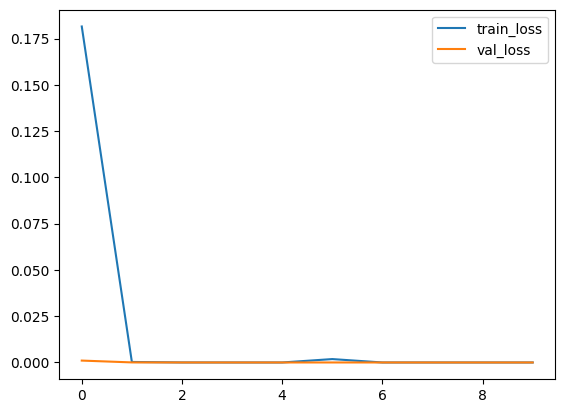

1556/1556 [==============================] - 2s 1ms/step - loss: 2.2660e-09 - accuracy: 1.0000
Accuracy of TensorFlow model: 1.0000


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразовываем y_train и y_test в одномерные массивы
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Масштабирование данных
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Инициализация модели нейронной сети
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компилируем модель с указанием функции потерь
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель с использованием x_train и y_train с выделением 20% данных для валидации
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

# Выводим график потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Оцениваем точность модели на тестовых данных
accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Accuracy of TensorFlow model: {accuracy[1]:.4f}')

**AutoKeras**

In [ ]:
import autokeras as ak
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming x_data is your feature matrix and y_data is the target variable
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Convert data to pandas DataFrame (if not already)
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Create and train AutoModel
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=1)
clf.fit(x_train_df, y_train_df, epochs=10)

# Evaluate the model
accuracy = clf.evaluate(x_test_df, y_test_df)
print("Accuracy of AutoKeras model:", accuracy)

**Выводы:**

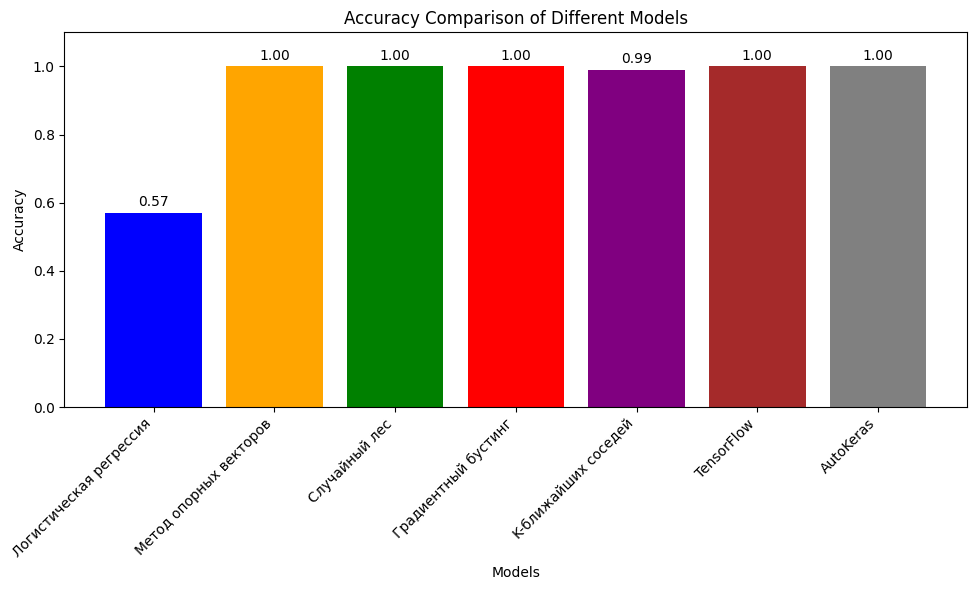

In [29]:
import matplotlib.pyplot as plt

# Создаем списки для хранения результатов обучения
model_names = ["Логистическая регрессия", "Метод опорных векторов", "Случайный лес", "Градиентный бустинг", "K-ближайших соседей", "TensorFlow", "AutoKeras"]
accuracies = [0.57, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0]

# Строим график
fig, ax = plt.subplots(figsize=(10, 6))

# Добавляем значения точности над столбцами
bars = ax.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray'])
for bar, accuracy, model_name in zip(bars, accuracies, model_names):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{accuracy:.2f}", ha='center', color='black')

# Настраиваем оси и легенду
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45, ha='right')  # Поворачиваем горизонтальные надписи под углом
plt.tight_layout()  # Делаем компактный макет
plt.ylim(0, 1.1)
plt.show()

**Выводы:**



1.   Модель **Логистическая регрессия** имеет очень маленькую точность.
2.   Модель **Метод опорных векторов** имеет высокую точность, но очень долго обучается. Ресурсоёмко.
3.   Модель **Случайный лес** имеет высокую точность, и очень быстро обучается, что и вызывает сомнения. Возможно что то сделал не так.
4.   Модель **Градиентный бустинг** так же имеет высокую точность, и очень быстро обучается, что и вызывает сомнения. Возможно что то сделал не так.
5.   Модель **K-ближайших соседей** имеет невысокую точность.
6.   Модель с **TensorFlow** имеет высокую точность и довольно недолго обучается. Имеет большую вариативность, и гибкость в выде графиков и параметров.
7.   Модель **AutoKeras** тоже меет высокую точность и довольно недолго обучается. Имеет большую вариативность, и гибкость в выде графиков и параметров. А также удобна в том, что имеет автоподбор.


